# Tarea Pipelines

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-03-06

**Fecha de actualización:** 2022-03-06

In [10]:
#Importar librerías
import pandas as pd
import numpy as np
# Para escalar datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')


In [11]:
filename = 'data/abalone.data'
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
"""
Sex		        nominal			M, F, and I (infant)
Length		    continuous	mm	Longest shell measurement
Diameter	    continuous	mm	perpendicular to length
Height		    continuous	mm	with meat in shell
Whole weight	continuous	grams	whole abalone
Shucked weight	continuous	grams	weight of meat
Viscera weight	continuous	grams	gut weight (after bleeding)
Shell weight	continuous	grams	after being dried
Rings		    integer			+1.5 gives the age in years
"""
df.columns=['Sex','Length','Diameter','Height','WholeEeight','ShuckedWeight','isceraWeight','ShellWeight','Rings']
df.head()



,Sex,Length,Diameter,Height,WholeEeight,ShuckedWeight,isceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeEeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   isceraWeight   4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
df.describe()
df['Sex'] = df['Sex'].replace({'M':7,'F':1,'I':2})
df['Sex'].unique()

array([7, 1, 2], dtype=int64)

In [15]:
X = df.loc[:,['Sex','Length','Diameter','Height','WholeEeight','ShuckedWeight','isceraWeight','ShellWeight']]
## X = df.loc[:,['ShellWeight']]
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=3)


## Estimación de la edad utilizando KNN(Regresión) con tuberías.

La edad del abulón se calcula de acuerdo al número de anillos:

$Edad = Rings +1.5$

In [19]:
X = df.loc[:,['Sex','Length','Diameter','Height','WholeEeight','ShuckedWeight','isceraWeight','ShellWeight']]
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=3)

bestN = 1;
bestScore = 0
# Buscar el número de vecinos que mejor ajuste proporcione(entre 1 y 100). 
for i in range(1, 50):
    # Crear la tubería, definiendo las transforaciones y modelos a utilizar de forma secuencial
    pipe = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i, weights='distance'))
    pipe.fit(X_train,y_train)
    iScore = pipe.score(X_test, y_test)
    if iScore > bestScore:
        bestScore = iScore
        bestN = i
pipe = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=bestN, weights='distance'))
pipe.fit(X_train,y_train)

print('\n\nBest N: ', bestN)
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))



Best N:  12
Training accuracy: 1.0
Testing accuracy: 0.5162885510602508


## Estimación del sexo utilizando KNN (Clasificación) con tuberías.



Best N:  94
Training accuracy: 1.0
Testing accuracy: 0.5538277511961722


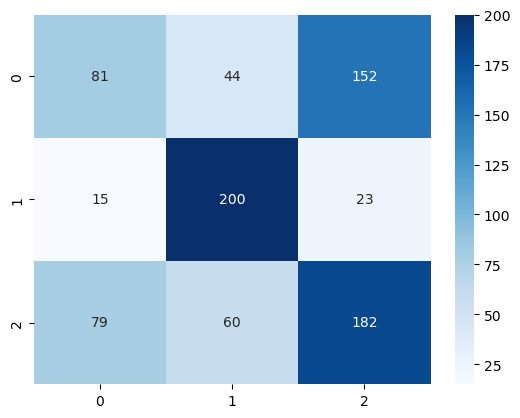

In [20]:
X = df.loc[:,['Length','Diameter','Height','WholeEeight','ShuckedWeight','isceraWeight','ShellWeight','Rings']]
y = df['Sex']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=3)

bestN = 1;
bestScore = 0

# Buscar el número de vecinos que mejor ajuste proporcione(entre 1 y 100). 
for i in range(1, 100):
    # Crear la tubería, definiendo las transforaciones y modelos a utilizar de forma secuencial
    pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=i, weights='distance'))
    pipe.fit(X_train,y_train)
    iScore = pipe.score(X_test, y_test)
    if iScore > bestScore:
        bestScore = iScore
        bestN = i

pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=bestN, weights='distance'))
pipe.fit(X_train,y_train)

confMatrix = confusion_matrix(y_test,pipe.predict(X_test))
sns.heatmap(confMatrix, annot=True, cmap='Blues',fmt='g')

print('\n\nBest N: ', bestN)
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

## Respuestas a preguntas

1. ¿Por qué querrías ocupar una tubería para KNN?

    * Minimizar la probabilidad de cometer errores.
    * Hacer más legible el código.
    * Mostrar de forma clara la secuencia a seguir para entrenar y probar el modelo.

2. ¿Para qué otros modelos o tareas sería útil usar una tubería?
   
   Las tuberías resultan útiles para cualquier modelo que requiera seguir una secuencia de tareas. De este modo, todos los pasos se ensamblan en una sola sentencia, resultando el proceso más entendible y trazable. Mientras mayor sea la cantidad de transformaciones que se deban aplicar a los datos, más aportarán las tuberías a la facilidad de entendimiento del proceso.
